## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [43]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [46]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [47]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [48]:
print(data[data == 'none'].count())
quant = ['duration', 'amount', 'age']
binary = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
category = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans']
order = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'housing', 'job']

status                       0
duration                     0
credit_history               0
purpose                      0
amount                       0
savings                      0
employment_duration          0
installment_rate             0
personal_status_sex          0
other_debtors              907
present_residence            0
property                     0
age                          0
other_installment_plans    814
housing                      0
number_credits               0
job                          0
people_liable                0
telephone                    0
foreign_worker               0
credit_risk                  0
dtype: int64


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [49]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [50]:
print(data[(data['age'] < 30) & (data['housing'] == 'rent')].count()[0] / data.count()[0])
print(data[(data['age'] > 40) & (data['housing'] == 'rent')].count()[0] / data.count()[0])

0.246
0.185


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [51]:
data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>=6'))].count()[0]

1

### Задание 6 (1 балл)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

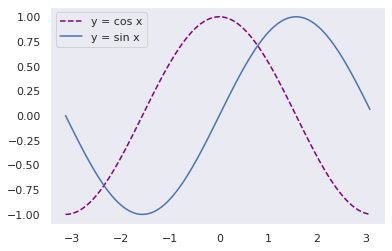

In [53]:
x = np.arange(-np.pi, np.pi, np.pi / 50)
y = np.cos(x)
z = np.sin(x)
plt.plot(x, y, linestyle='dashed', c = 'purple')
plt.plot(x, z)
plt.legend(['y = cos x', 'y = sin x'])
plt.grid()
plt.show()


### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

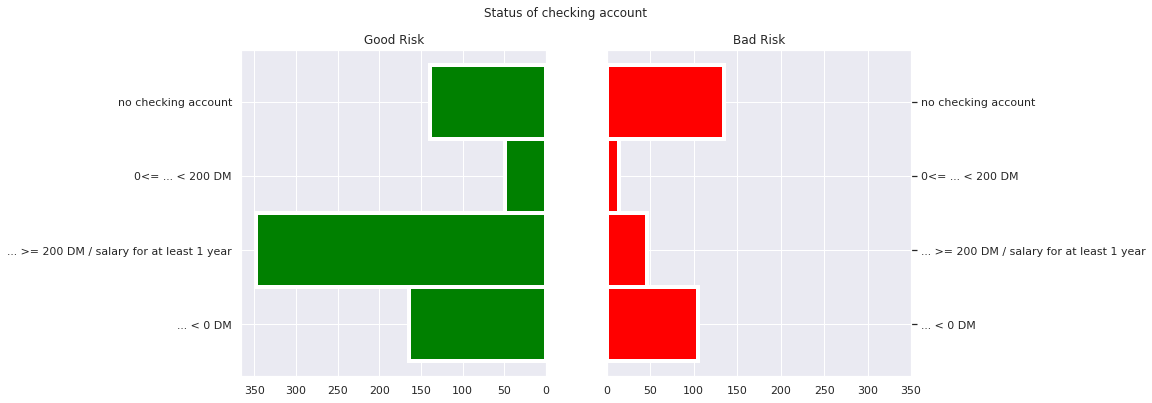

In [60]:
bad = data[data['credit_risk'] == 'bad']
bad_1 = bad[bad['status'] == 'no checking account'].count()[0]
bad_2 = bad[bad['status'] == '0<= ... < 200 DM'].count()[0]
bad_3 = bad[bad['status'] == '... >= 200 DM / salary for at least 1 year'].count()[0]
bad_4 = bad[bad['status'] == '... < 0 DM'].count()[0]

bad_values = [bad_1, bad_2, bad_3, bad_4]

good = data[data['credit_risk'] == 'good']
good_1 = good[good['status'] == 'no checking account'].count()[0]
good_2 = good[good['status'] == '0<= ... < 200 DM'].count()[0]
good_3 = good[good['status'] == '... >= 200 DM / salary for at least 1 year'].count()[0]
good_4 = good[good['status'] == '... < 0 DM'].count()[0]

good_values = [good_1, good_2, good_3, good_4]
index = ['no checking account', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year', '... < 0 DM']


graph, (plot_1, plot_2) = plt.subplots(1, 2)
plot_1.barh(index, good_values, 1, color='green', linewidth=4)
plot_1.set_title('Good Risk')
plot_1.invert_xaxis()
plot_1.invert_yaxis()
plot_1.set_xticks([0, 50, 100, 150, 200, 250, 300, 350])



plot_2.barh(index, bad_values, 1, color='red', linewidth=4)
plot_2.set_title('Bad Risk')
plot_2.tick_params(labelright='on')
plot_2.yaxis.tick_right()
plot_2.invert_yaxis()
plot_2.set_xticks([0, 50, 100, 150, 200, 250, 300, 350])

graph.suptitle('Status of checking account')
graph.set_figwidth(12)
graph.set_figheight(6)

# В большинстве своем у людей, у которых самая плохая оценка надежности, не проверенный аккаунт, либо статус '< 0 DM'
# Подавляющее большинство людей, с хорошей оценкой надежности, имеют статус '... >= 200 DM / salary for at least 1 year'

### Задание 8  (0.5 балла)

In [61]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

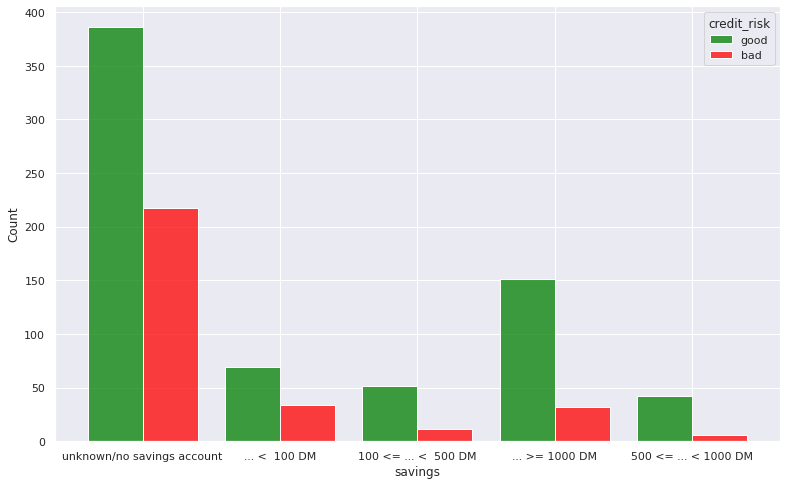

In [65]:
sns.histplot(data=data, x="savings", hue="credit_risk", multiple='dodge', shrink=.8, palette=['green', 'red']);
sns.set(rc={'figure.figsize':(13, 8)})

#Достаточно интересный парадокс, самая лучшая оценка надежности у людей неизвестных или без сберегательного счета.
# Причем точная аналогия и с самой плохой оценкой - больше всего людей неизвестных или без счета.
# Так же есть положительный скачок для сбережений '>= 1000 DM', там оценка в основном положительная.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

Text(0.5, 1.0, 'Distribution of the amount by age')

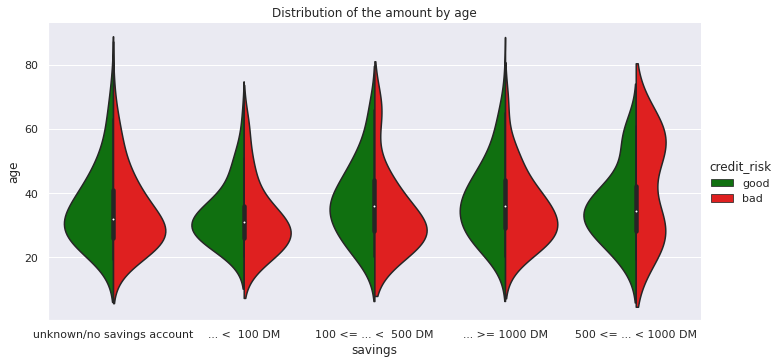

In [ ]:
sns.catplot(x='savings',
            y='age',
            hue='credit_risk',
            kind='violin',
            split=True,
            bw=0.6,
            palette=['green', 'red'],
            data=data,
            height=5, 
            aspect=2);
plt.title("Distribution of the amount by age")

# Заметим, что почти все распределения являются приближенными к нормальному
# Среднее значение возраста, вне зависимости от сбережений, находится в районе 25-28 лет, как для хорошей оценки, так и для плохой.
# Поэтому, допускаю, что из зависимости возраста и сбережений сложно дать оценку надежности.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

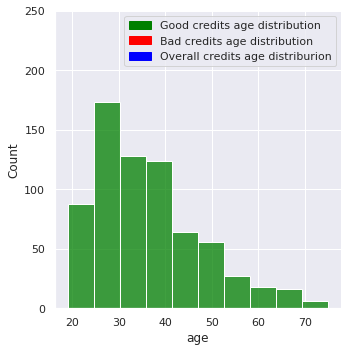

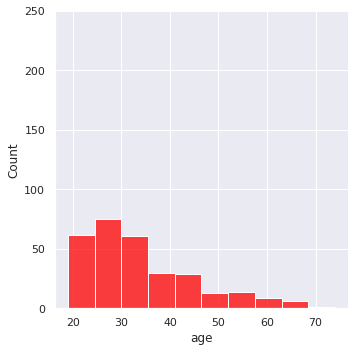

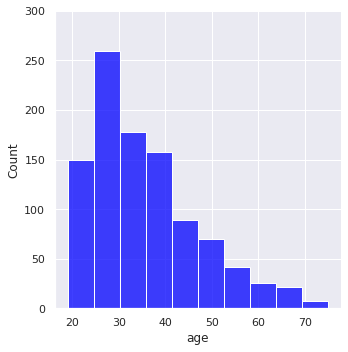

In [ ]:
import matplotlib.patches as mpatches

sns.displot(good, x="age", bins=10, color='green')
plt.ylim(0, 250)

first_leg = mpatches.Patch(color='green', label='Good credits age distribution')
second_leg = mpatches.Patch(color='red', label='Bad credits age distribution')
thrid_leg = mpatches.Patch(color='blue', label='Overall credits age distriburion')
plt.legend(handles=[first_leg ,second_leg ,thrid_leg ])

sns.displot(bad, x="age", bins=10, color='red')
plt.ylim(0, 250)

sns.displot(data, x="age", bins=10, color='blue')
plt.ylim(0, 300)


plt.show()
# Основная масса людей с положительной оценкой находится в возрастном диапазоне 25-40 лет.
# В то время как большинство людей с отрицательной оценкой находятся в диапазоне 20-35.
# Но делать отсюда явные выводы сделать сразу нельзя, так как у нас в принципе из 1000 людей, примерно 700 находятся 
# в диапазоне 20-40 лет, то есть результат ожидаемый и не совсем информативный.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

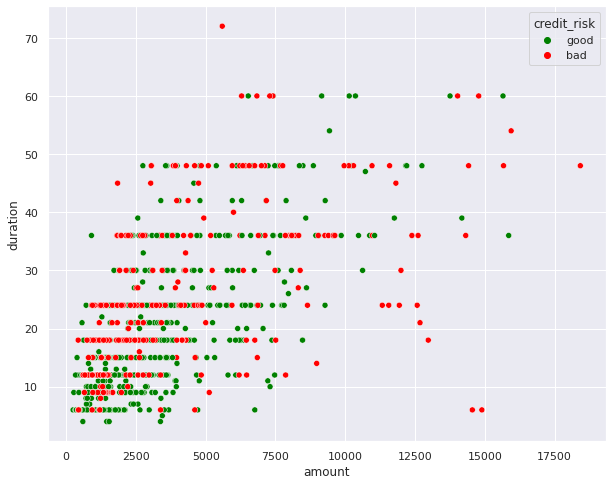

In [ ]:
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette=['green', 'red'])
#Честно говоря по этой диаграмме достаточно сложно что-то сказать.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

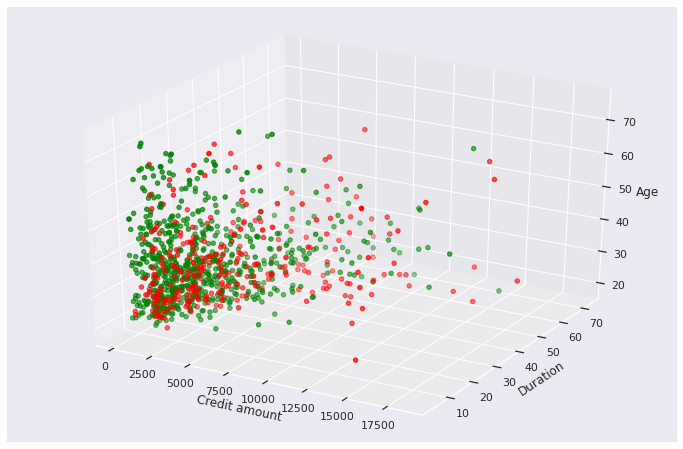

In [ ]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(projection='3d')

colors = {'good':'green', 'bad':'red'}

ax.scatter(data['amount'], data['duration'], data['age'], c=data['credit_risk'].map(colors))

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
def encoder(data, tag):
    new_data = data.copy()
    for column in tag:
        func_change = {}
        i = 0
        for val in sorted(new_data[column].unique()):
            func_change[val] = i
            i += 1
        new_data[column] = new_data[column].map(func_change)
    return new_data

data = encoder(data, binary)
data = encoder(data, order)
data = data.drop(columns=category)
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,1049,4,2,2,3,21,0,0,1,0,0,0,1
1,3,9,2799,4,0,1,0,36,0,1,1,1,0,0,1
2,0,12,841,0,1,1,3,23,0,0,3,0,0,0,1
3,3,12,2122,4,0,0,0,39,0,1,3,1,0,1,1
4,3,12,2171,4,0,2,3,38,2,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,1987,4,0,1,3,21,0,0,3,1,0,0,0
996,3,24,2303,4,3,2,2,45,2,0,1,0,0,0,0
997,1,21,12680,1,3,2,3,30,1,0,0,0,1,0,0
998,0,12,6468,1,4,1,2,52,2,0,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(X_test: np.array) -> np.array:
    res = np.array([0] * 14)
    res[0] = 1
    return X_test @ res > 0
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение

accuracy_score(y_test, predict(X_test))


<ipython-input-23-3570852d96f7>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.636